### Load the Libraries and data preparation

In [85]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
# Logistic Regression
from sklearn.linear_model import LogisticRegression
# KNN
from sklearn.neighbors import KNeighborsClassifier
# Linear SVC
from sklearn.svm import LinearSVC
# SVM RBF
from sklearn.svm import SVC
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
# Naïve Bayes
from sklearn.naive_bayes import GaussianNB
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
# AdaBoost Classifier
from sklearn.ensemble import AdaBoostClassifier
# XGBoost Classifier
from xgboost import XGBClassifier
# CatBoost Classifier
from catboost import CatBoostClassifier

from sklearn.ensemble import VotingClassifier
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.neural_network import MLPClassifier
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC




In [86]:
df =pd.read_csv("Dataset/BitcoinSampledData.csv")
df.shape

(4343, 11)

In [87]:
df.head()

,Unnamed: 0,address,year,day,length,weight,count,looped,neighbors,income,label
0,0,13n9Cb8AewWxEoJqXrW2Jodw3DUxrabJn4,2011,38,16,0.03125,1,0,2,4.500000e+09,white
1,1,1KhsKUPC3ANVoWA9fHJC3FCTp5jMMXKAg1,2011,19,0,1.00000,1,0,2,1.190000e+08,white
2,2,16pUi71yXDB8gmQ3xKuc4WsSVbZqMQLha1,2011,31,6,0.06250,1,0,2,4.220000e+09,white
3,3,1EoNJWj2n1PmRN1Nmnf5Z9jduv9Bdg8SRh,2011,24,0,0.50000,1,0,1,1.800000e+09,white
4,4,1Q5xy6RzmBWHS7boaHpnFKrU64E6W19jKv,2011,13,16,0.06250,1,0,2,4.290000e+09,white


In [88]:
df = df.drop(columns=["Unnamed: 0","address", "year", "day"])
df

,length,weight,count,looped,neighbors,income,label
0,16,0.03125,1,0,2,4.500000e+09,white
1,0,1.00000,1,0,2,1.190000e+08,white
2,6,0.06250,1,0,2,4.220000e+09,white
3,0,0.50000,1,0,1,1.800000e+09,white
4,16,0.06250,1,0,2,4.290000e+09,white
...,...,...,...,...,...,...,...
4338,4,1.00000,1,0,2,4.950000e+09,white
4339,0,1.00000,1,0,1,5.783289e+07,paduaCryptoWall
4340,6,0.38750,9,0,2,1.000000e+08,princetonCerber
4341,0,0.50000,1,0,2,4.100000e+08,princetonLocky


### Divinding income by 100 million because 1 bitcoin = 100 million Satoshi

In [89]:
### COnverting satoshi to bitcoin
df.income = df.income / 100000000.

In [90]:
df.label.unique()

array(['white', 'montrealCryptoLocker', 'princetonCerber',
       'paduaCryptoWall', 'princetonLocky', 'montrealCryptXXX',
       'montrealNoobCrypt', 'montrealDMALockerv3', 'montrealSamSam',
       'montrealDMALocker', 'montrealFlyper', 'montrealGlobeImposter',
       'montrealCryptoTorLocker2015', 'montrealGlobev3', 'montrealRazy',
       'paduaJigsaw', 'montrealWannaCry', 'montrealAPT',
       'montrealVenusLocker'], dtype=object)

In [91]:
df.shape

(4343, 7)

In [92]:
df.isnull().sum()

length       0
weight       0
count        0
looped       0
neighbors    0
income       0
label        0
dtype: int64

In [93]:
df.dtypes

length         int64
weight       float64
count          int64
looped         int64
neighbors      int64
income       float64
label         object
dtype: object

In [94]:
df = df.drop_duplicates()

In [95]:
df.label.unique()

array(['white', 'montrealCryptoLocker', 'princetonCerber',
       'paduaCryptoWall', 'princetonLocky', 'montrealCryptXXX',
       'montrealNoobCrypt', 'montrealDMALockerv3', 'montrealSamSam',
       'montrealDMALocker', 'montrealFlyper', 'montrealGlobeImposter',
       'montrealCryptoTorLocker2015', 'montrealGlobev3', 'montrealRazy',
       'paduaJigsaw', 'montrealWannaCry', 'montrealAPT',
       'montrealVenusLocker'], dtype=object)

In [96]:
df.label.value_counts()

white                          2049
paduaCryptoWall                 592
montrealCryptoLocker            458
princetonCerber                 406
princetonLocky                  273
montrealCryptXXX                 94
montrealNoobCrypt                25
montrealDMALockerv3              19
montrealDMALocker                13
montrealSamSam                    7
montrealCryptoTorLocker2015       5
montrealGlobeImposter             3
montrealGlobev3                   2
montrealRazy                      2
montrealAPT                       2
montrealFlyper                    1
paduaJigsaw                       1
montrealWannaCry                  1
montrealVenusLocker               1
Name: label, dtype: int64

In [97]:
df[df.income == df.income.max()]

,length,weight,count,looped,neighbors,income,label
517,2,1.0,1,0,1,10000.0,white


### EDA (Exploratory Data Analysis)

In [98]:
df.describe()

,length,weight,count,looped,neighbors,income
count,3954.000000,3.954000e+03,3954.000000,3954.000000,3954.000000,3954.000000
mean,33.538189,5.426225e-01,351.772635,68.815377,2.061963,45.984839
std,48.402773,1.061826e+00,1160.517809,498.824092,2.466462,262.132140
min,0.000000,1.810000e-25,1.000000,0.000000,1.000000,0.300000
25%,2.000000,3.211551e-02,1.000000,0.000000,1.000000,1.042500
50%,10.000000,2.501221e-01,1.000000,0.000000,2.000000,4.000000
75%,36.000000,1.000000e+00,3.000000,0.000000,2.000000,34.852655
max,144.000000,3.110859e+01,10625.000000,8489.000000,79.000000,10000.000000


In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3954 entries, 0 to 4342
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   length     3954 non-null   int64  
 1   weight     3954 non-null   float64
 2   count      3954 non-null   int64  
 3   looped     3954 non-null   int64  
 4   neighbors  3954 non-null   int64  
 5   income     3954 non-null   float64
 6   label      3954 non-null   object 
dtypes: float64(2), int64(4), object(1)
memory usage: 247.1+ KB


### plotting shape on length 

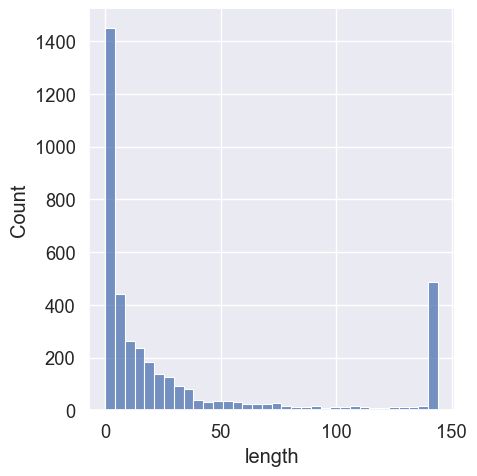

In [102]:
sns.displot(df.length)

### plotting scatterplot between length and weight we can see one thing where length of transaction is greater than 135 there weight is more

<Axes: xlabel='length', ylabel='weight'>

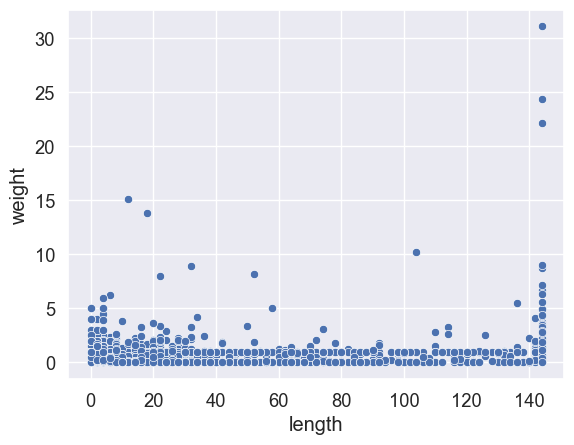

In [83]:
sns.scatterplot(x=df.length, y=df.weight)



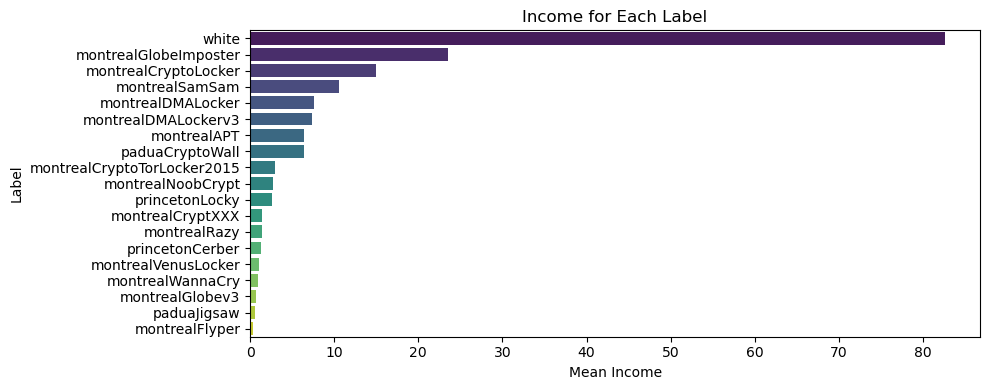

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
label_counts = df['label'].value_counts()


label_income_mean = df.groupby("label")["income"].mean().reset_index() 
label_income_mean_sorted = label_income_mean.sort_values(by="income", ascending=False)

plt.figure(figsize=(10, 4))
sns.barplot(x="income", y="label", data=label_income_mean_sorted, palette="viridis")
plt.xlabel("Mean Income")
plt.ylabel("Label")
plt.title("Income for Each Label")
plt.tight_layout()
plt.show()

### white is non fraud transaction they have highest number of mean income followed by MontrealglobalImposter and others

In [19]:
label_income_stats = df.groupby("label")["income"].describe()
label_income_stats
label_income_stats_sorted = label_income_stats.sort_values(by="mean", ascending=False)
label_income_stats_sorted.head()


,count,mean,std,min,25%,50%,75%,max
label,,,,,,,,
white,2049.0,82.652227,359.060866,0.30,4.370000,26.900000,47.700000,10000.000000
montrealGlobeImposter,3.0,23.573267,34.145783,3.57,3.859900,4.149800,33.574900,63.000000
montrealCryptoLocker,458.0,14.936118,60.051302,0.30,0.849955,2.118756,8.323142,875.000000
montrealSamSam,7.0,10.585643,12.389836,1.00,1.350000,3.400000,19.499750,28.000000
montrealDMALocker,13.0,7.610610,6.839774,1.50,4.000000,6.000000,8.365000,26.733337


In [20]:
df.label.unique()

array(['white', 'montrealCryptoLocker', 'princetonCerber',
       'paduaCryptoWall', 'princetonLocky', 'montrealCryptXXX',
       'montrealNoobCrypt', 'montrealDMALockerv3', 'montrealSamSam',
       'montrealDMALocker', 'montrealFlyper', 'montrealGlobeImposter',
       'montrealCryptoTorLocker2015', 'montrealGlobev3', 'montrealRazy',
       'paduaJigsaw', 'montrealWannaCry', 'montrealAPT',
       'montrealVenusLocker'], dtype=object)

### Creating dummy values

In [21]:
df1 = pd.get_dummies(df, drop_first=True)
df1.shape


(3954, 24)

In [22]:
df1

,length,weight,count,looped,neighbors,income,label_montrealCryptXXX,label_montrealCryptoLocker,label_montrealCryptoTorLocker2015,label_montrealDMALocker,...,label_montrealNoobCrypt,label_montrealRazy,label_montrealSamSam,label_montrealVenusLocker,label_montrealWannaCry,label_paduaCryptoWall,label_paduaJigsaw,label_princetonCerber,label_princetonLocky,label_white
0,16,0.03125,1,0,2,45.000000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,1.00000,1,0,2,1.190000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,6,0.06250,1,0,2,42.200000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0.50000,1,0,1,18.000000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,16,0.06250,1,0,2,42.900000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4337,4,0.25000,1,0,2,95.900000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4338,4,1.00000,1,0,2,49.500000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4339,0,1.00000,1,0,1,0.578329,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4340,6,0.38750,9,0,2,1.000000,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


### Scaling First then maintaining 90% variance ration

In [23]:
dfScaled = StandardScaler().fit_transform(df1)
dfScaled

array([[-0.36238435, -0.4816582 , -0.30229351, ..., -0.33827602,
        -0.27233184,  0.96422083],
       [-0.69298573,  0.4308007 , -0.30229351, ..., -0.33827602,
        -0.27233184,  0.96422083],
       [-0.56901021, -0.45222404, -0.30229351, ..., -0.33827602,
        -0.27233184,  0.96422083],
       ...,
       [-0.69298573,  0.4308007 , -0.30229351, ..., -0.33827602,
        -0.27233184, -1.03710682],
       [-0.56901021, -0.1461088 , -0.29539916, ...,  2.9561658 ,
        -0.27233184, -1.03710682],
       [-0.69298573,  0.4308007 , -0.30229351, ..., -0.33827602,
        -0.27233184,  0.96422083]])

### Finding number of components for PCA having variance ratio greater than equal to 90% so no more data are lost

In [24]:
pca = PCA()
pca.fit(dfScaled)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.9) + 1
d

19

### we need to find number of clusters first so calculating SSE

In [25]:
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN

def calculate_wcss(data):
    wcss = []
    for n in range(1, 5):
        kmeans = KMeans(n_clusters=n, random_state=0)
        kmeans.fit(X=data)
        wcss.append(kmeans.inertia_)
    
    return wcss

In [26]:
sse = calculate_wcss(dfScaled)
sse

C:\Users\Rajat\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Rajat\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Rajat\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Rajat\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[94895.99999999999, 88501.41835191379, 83455.52662858841, 78999.68422735485]

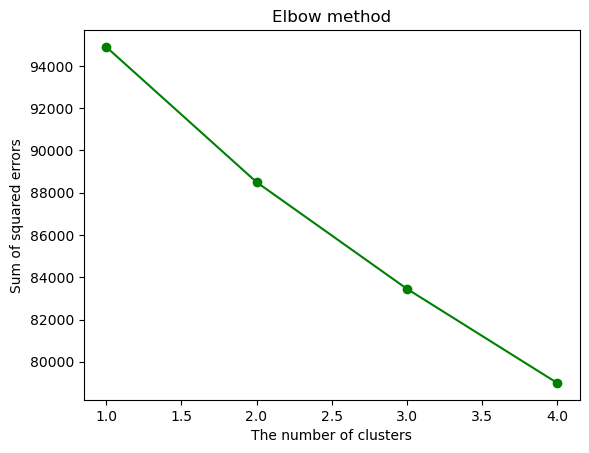

In [27]:
import matplotlib.pyplot as plt
plt.plot(range(1,5), sse, '-go')
plt.xlabel('The number of clusters')
plt.ylabel('Sum of squared errors')
plt.title('Elbow method')
plt.show()

###  Applying 3 clustering methods --> KMeans, Agglometric, DBScan 

In [28]:
from sklearn.metrics import calinski_harabasz_score, davies_bouldin_score
from sklearn.metrics import silhouette_score

clusters = [ KMeans(n_clusters=3), AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
            , DBSCAN(eps=0.8)]

sh_result = []
ch_result = []
db_result = []


### Creating pipeline for feature scaling, pca and then clustering 

In [29]:
for cl in clusters: 
    pipe = Pipeline([
        ("scaling", StandardScaler()),
        ("pca", PCA(n_components=d) ),
        ("clusters", cl)
    ])

    pipe.fit(df1)
    cluster_labels = pipe.named_steps['clusters'].labels_
    
    print(cluster_labels)

    # Calculate and append the scores for each clustering algorithm
    sh_result.append(silhouette_score(df1, cluster_labels))
    ch_result.append(calinski_harabasz_score(df1, cluster_labels))
    db_result.append(davies_bouldin_score(df1, cluster_labels))





C:\Users\Rajat\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[0 0 0 ... 0 0 0]


C:\Users\Rajat\anaconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


[1 1 1 ... 0 0 1]
[0 0 0 ... 3 2 0]


In [30]:
clusteringNames = ["Kmeans", "agglo", "dbscan"]

In [31]:
ResultSummary = pd.DataFrame(zip(clusteringNames,sh_result, ch_result, db_result), columns=["Names","silhoutte", "calibansiki", "Davies"])

### Checking score from the list 

In [32]:
ResultSummary

,Names,silhoutte,calibansiki,Davies
0,Kmeans,0.382356,940.381536,1.867359
1,agglo,0.121691,350.721957,1.712771
2,dbscan,-0.599751,93.896635,7.085005


### BEST PIPE FOR CLUSTERING 

In [33]:
pipe = Pipeline([
        ("scaling", StandardScaler()),
        ("pca", PCA(n_components=d) ),
        ("clusters", AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward'))
    ])



pipe.fit(df1)
cluster_labels = pipe.named_steps['clusters'].labels_
print(cluster_labels)


C:\Users\Rajat\anaconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


[1 1 1 ... 0 0 1]


In [34]:
np.unique(cluster_labels)

array([0, 1], dtype=int64)

### Below is clustering of both pca components according to agglomerative clustering we can see difference how it is done

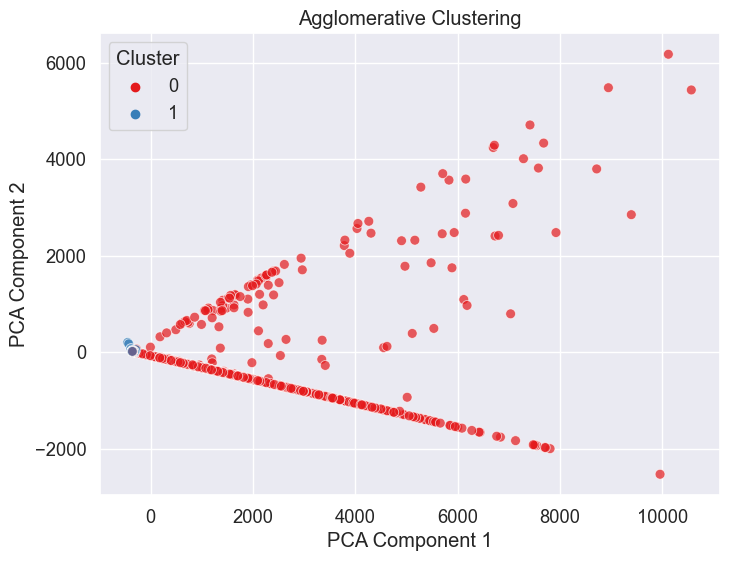

In [105]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(df1)


plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=cluster_labels, palette='Set1', s=50, alpha=0.7)
plt.title('Agglomerative Clustering')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.show()

In [36]:
df1["Classification"] = cluster_labels


In [37]:
df1.Classification.unique()

array([1, 0], dtype=int64)

In [38]:
df1[df1.label_white == 1].index

Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
            ...
            4320, 4321, 4323, 4329, 4334, 4335, 4336, 4337, 4338, 4342],
           dtype='int64', length=2049)

In [39]:
dfQuery = df.copy()
dfQuery["Classification"] = cluster_labels
dfQuery

,length,weight,count,looped,neighbors,income,label,Classification
0,16,0.03125,1,0,2,45.000000,white,1
1,0,1.00000,1,0,2,1.190000,white,1
2,6,0.06250,1,0,2,42.200000,white,1
3,0,0.50000,1,0,1,18.000000,white,1
4,16,0.06250,1,0,2,42.900000,white,1
...,...,...,...,...,...,...,...,...
4337,4,0.25000,1,0,2,95.900000,white,1
4338,4,1.00000,1,0,2,49.500000,white,1
4339,0,1.00000,1,0,1,0.578329,paduaCryptoWall,0
4340,6,0.38750,9,0,2,1.000000,princetonCerber,0


In [40]:
df1.Classification 

0       1
1       1
2       1
3       1
4       1
       ..
4337    1
4338    1
4339    0
4340    0
4342    1
Name: Classification, Length: 3954, dtype: int64

In [41]:
dfQuery[(dfQuery.Classification == 1) & (dfQuery.label == "montrealAPT")]

,length,weight,count,looped,neighbors,income,label,Classification
2778,6,0.5000,1,0,2,1.880000,montrealAPT,1
3940,8,0.3125,1,1,3,10.885986,montrealAPT,1


In [42]:
ind = df[(dfQuery.Classification == 1) & (dfQuery.label == "montrealAPT")].index
dfQuery = dfQuery.drop(ind)

In [43]:
dfQuery[dfQuery.Classification == 1].label.unique()

array(['white'], dtype=object)

In [44]:
###MOntrealRazy is dangerous group of doing Ransomeware activities 

dfQuery[dfQuery.Classification == 0].income.mean()

6.842881814017764

In [45]:
dfQuery[dfQuery.Classification == 1].describe()

,length,weight,count,looped,neighbors,income,Classification
count,2038.000000,2.038000e+03,2038.000000,2038.000000,2038.000000,2038.000000,2038.0
mean,20.605496,4.392742e-01,3.625613,0.209519,1.887144,82.784108,1.0
std,27.566823,5.081184e-01,8.780790,2.658388,0.962743,359.930635,0.0
min,0.000000,3.180000e-22,1.000000,0.000000,1.000000,0.300000,1.0
25%,2.000000,3.125000e-02,1.000000,0.000000,1.000000,4.280000,1.0
50%,12.000000,2.500000e-01,1.000000,0.000000,2.000000,27.050000,1.0
75%,26.000000,9.612745e-01,1.000000,0.000000,2.000000,47.700000,1.0
max,144.000000,5.000000e+00,67.000000,51.000000,12.000000,10000.000000,1.0


In [46]:
dfQuery[dfQuery.Classification == 0].describe()

,length,weight,count,looped,neighbors,income,Classification
count,1914.000000,1.914000e+03,1914.000000,1914.000000,1914.000000,1914.000000,1914.0
mean,47.336468,6.528088e-01,722.841170,141.937304,2.247649,6.842882,0.0
std,60.519347,1.425246e+00,1586.163179,709.784202,3.393562,32.612354,0.0
min,0.000000,1.810000e-25,1.000000,0.000000,1.000000,0.300000,0.0
25%,2.000000,5.555556e-02,1.000000,0.000000,1.000000,0.800000,0.0
50%,8.000000,3.309845e-01,1.000000,0.000000,2.000000,1.500000,0.0
75%,140.000000,1.000000e+00,311.250000,0.000000,2.000000,3.600000,0.0
max,144.000000,3.110859e+01,10625.000000,8489.000000,79.000000,875.000000,0.0


### Attack patterns By Class 1 and Class 0
### Class 1 = not fraud transactions
### Class 0 = fraud transactions

In [47]:
wt = df1[df1.Classification == 1].weight
wt1 = df1[df1.Classification == 0].weight


lt = df1[df1.Classification == 1].length
lt1 = df1[df1.Classification == 0].length

it = df1[df1.Classification == 1].income
it1 = df1[df1.Classification == 0].income

lo = df1[df1.Classification == 1].looped
lo1 = df1[df1.Classification == 0].looped

### Plotting pie chart to understand behaviour and pattern in both type of transactions fraud or not fraud

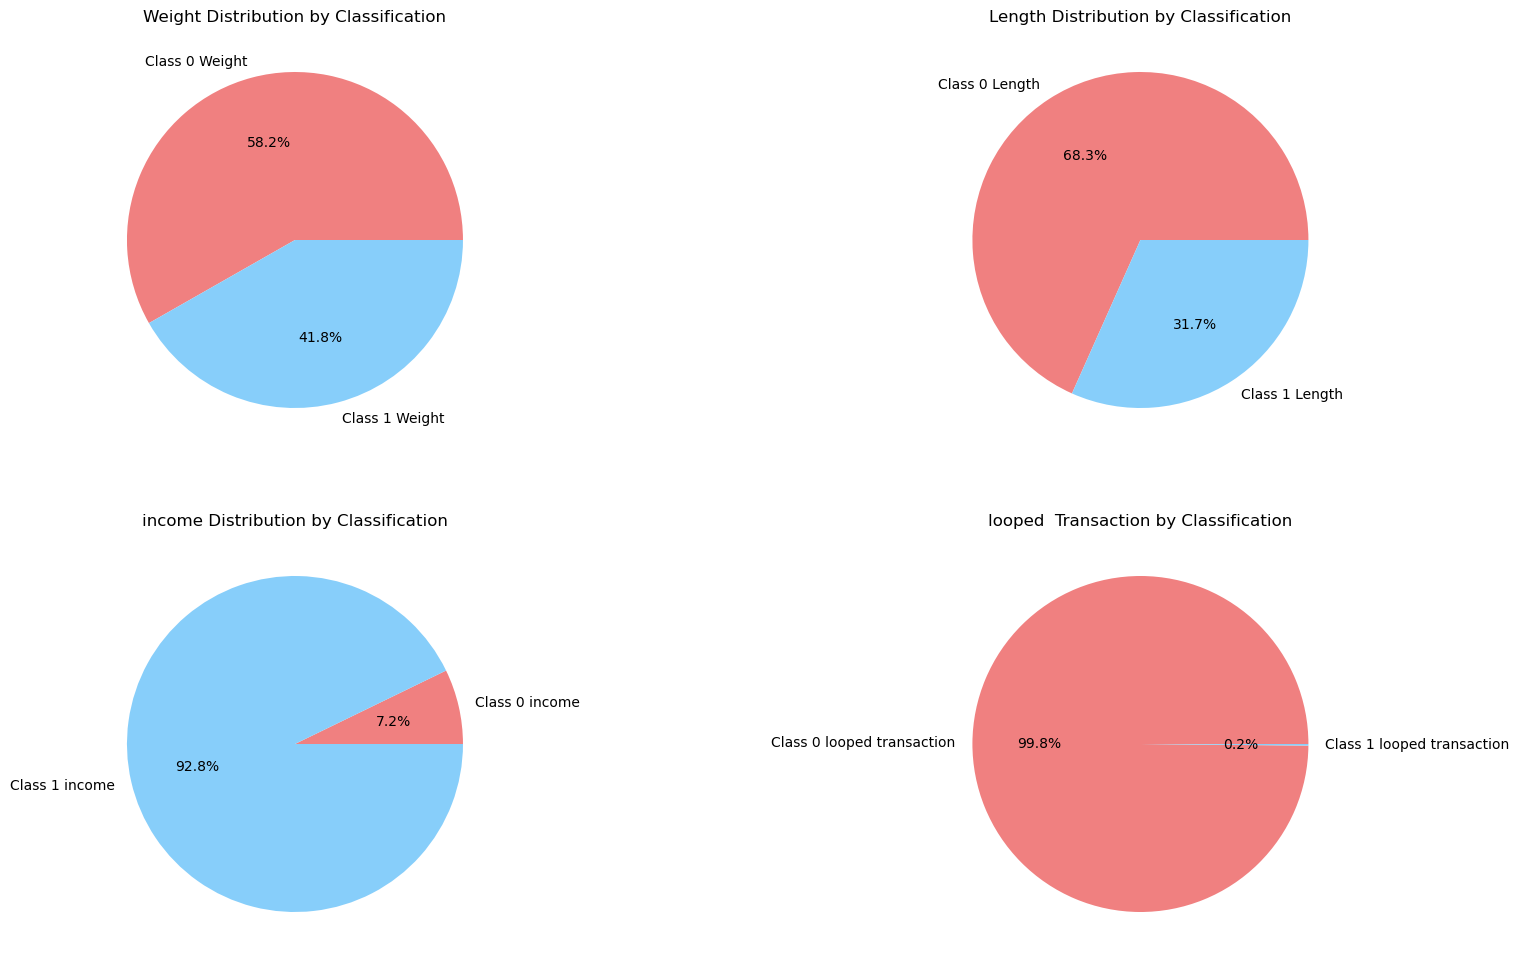

In [48]:
total_wt_class1 = wt.sum()
total_wt_class0 = wt1.sum()


total_lt_class1 = lt.sum()
total_lt_class0 = lt1.sum()
total_it_class1 = it.sum()
total_it_class0 = it1.sum()
total_l_class1 = lo.sum()
total_l_class0 = lo1.sum()

plt.figure(figsize=(20, 12))

# First subplot for weight distribution
plt.subplot(2, 2, 1)
plt.pie([total_wt_class0, total_wt_class1], labels=['Class 0 Weight', 'Class 1 Weight'], autopct='%1.1f%%', colors=['lightcoral', 'lightskyblue', 'yellow'])
plt.title("Weight Distribution by Classification")

# Second subplot for length distribution
plt.subplot(2, 2, 2)
plt.pie([total_lt_class0, total_lt_class1], labels=['Class 0 Length', 'Class 1 Length'], autopct='%1.1f%%', colors=['lightcoral', 'lightskyblue'])
plt.title("Length Distribution by Classification")

# Third subplot for 'it' distribution
plt.subplot(2, 2, 3)
plt.pie([total_it_class0, total_it_class1], labels=['Class 0 income', 'Class 1 income'], autopct='%1.1f%%', colors=['lightcoral', 'lightskyblue'])
plt.title("income Distribution by Classification")

plt.subplot(2, 2, 4)
plt.pie([total_l_class0, total_l_class1], labels=['Class 0 looped transaction', 'Class 1 looped transaction'], autopct='%1.1f%%', colors=['lightcoral', 'lightskyblue'])
plt.title("looped  Transaction by Classification")


# Show the plot
plt.show()

### Class 0 -> Attacks on less income, involves in higher looped transactions meaning it involves the same entity as both the sender and the receivercan occur for legitimate reasons, such as when a user is consolidating their funds or conducting internal transfers between their own accounts.They attacked on length of the transaction data in terms of the number of characters and more weight of the transaction. In the context of Bitcoin, the weight is a measure used to prioritize transactions for inclusion in blocks.

### Class 1 -> white transactions not fraud

 ### Implementing Classification Now 

In [49]:
dfQuery.head(3)

,length,weight,count,looped,neighbors,income,label,Classification
0,16,0.03125,1,0,2,45.00,white,1
1,0,1.00000,1,0,2,1.19,white,1
2,6,0.06250,1,0,2,42.20,white,1


In [50]:
dfQuery.drop(columns=["label"], inplace=True)

In [51]:
dfQuery = dfQuery.drop_duplicates()

In [52]:
dfQuery.shape

(3909, 7)

In [53]:
dfQuery.head()

,length,weight,count,looped,neighbors,income,Classification
0,16,0.03125,1,0,2,45.00,1
1,0,1.00000,1,0,2,1.19,1
2,6,0.06250,1,0,2,42.20,1
3,0,0.50000,1,0,1,18.00,1
4,16,0.06250,1,0,2,42.90,1


In [54]:
dfQuery.describe()

,length,weight,count,looped,neighbors,income,Classification
count,3909.000000,3.909000e+03,3909.000000,3909.000000,3909.000000,3909.000000,3909.000000
mean,33.910463,5.405869e-01,355.810437,69.607316,2.066769,46.484341,0.521361
std,48.554427,1.067085e+00,1166.566269,501.632873,2.479577,263.595241,0.499607
min,0.000000,1.810000e-25,1.000000,0.000000,1.000000,0.300000,0.000000
25%,2.000000,3.125000e-02,1.000000,0.000000,1.000000,1.060000,0.000000
50%,10.000000,2.500000e-01,1.000000,0.000000,2.000000,4.000000,1.000000
75%,36.000000,1.000000e+00,3.000000,0.000000,2.000000,35.500000,1.000000
max,144.000000,3.110859e+01,10625.000000,8489.000000,79.000000,10000.000000,1.000000


### If we look at shape of length we can see that it has curve in starting then went flat then have small curve again

C:\Users\Rajat\AppData\Local\Temp\ipykernel_3948\2207995747.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.length, kde=True)


<Axes: xlabel='length', ylabel='Density'>

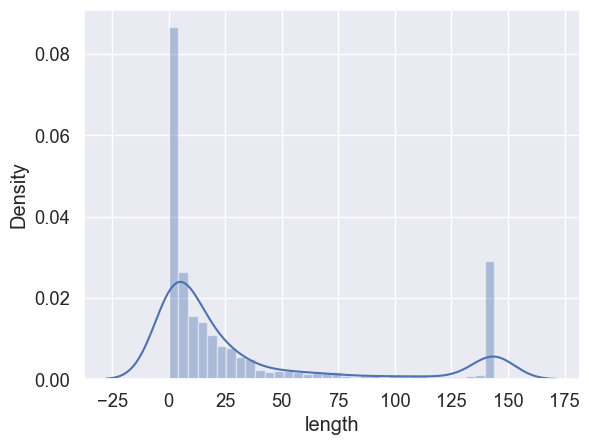

In [104]:
sns.distplot(df.length, kde=True)

In [56]:
dfQuery

,length,weight,count,looped,neighbors,income,Classification
0,16,0.03125,1,0,2,45.000000,1
1,0,1.00000,1,0,2,1.190000,1
2,6,0.06250,1,0,2,42.200000,1
3,0,0.50000,1,0,1,18.000000,1
4,16,0.06250,1,0,2,42.900000,1
...,...,...,...,...,...,...,...
4337,4,0.25000,1,0,2,95.900000,1
4338,4,1.00000,1,0,2,49.500000,1
4339,0,1.00000,1,0,1,0.578329,0
4340,6,0.38750,9,0,2,1.000000,0


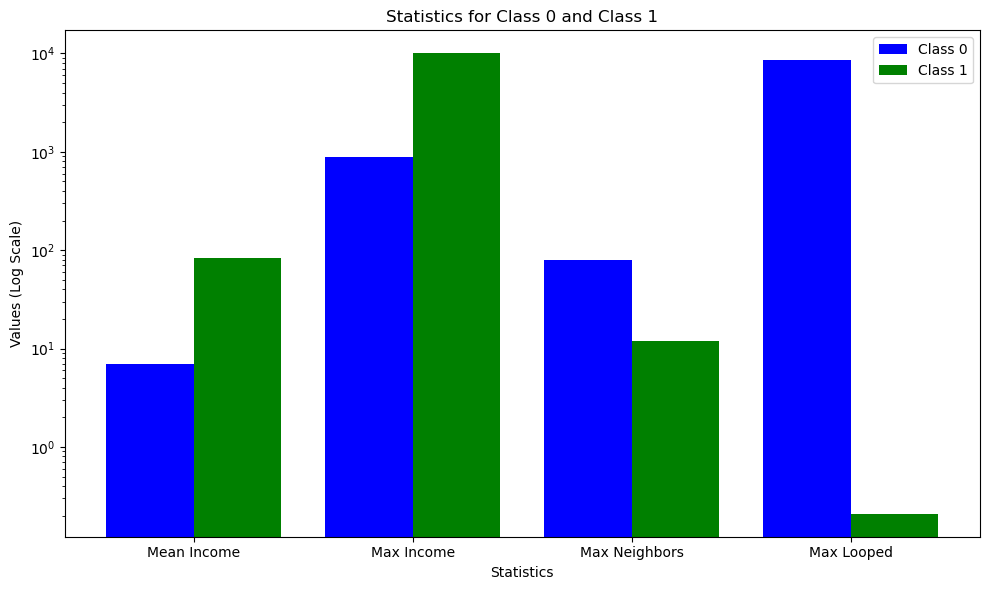

In [57]:
import matplotlib.pyplot as plt

# Data for Class 0
class_0_mean_income = dfQuery[dfQuery.Classification == 0].income.mean()
class_0_max_income = dfQuery[dfQuery.Classification == 0].income.max()
class_0_max_count = dfQuery[dfQuery.Classification == 0].neighbors.max()
class_0_max_looped = dfQuery[dfQuery.Classification == 0].looped.max()

# Data for Class 1
class_1_mean_income = dfQuery[dfQuery.Classification == 1].income.mean()
class_1_max_income = dfQuery[dfQuery.Classification == 1].income.max()
class_1_max_count = dfQuery[dfQuery.Classification == 1].neighbors.max()
class_1_max_looped = dfQuery[dfQuery.Classification == 1].looped.mean()

# Plotting the data
fig, ax = plt.subplots(figsize=(10, 6))
index = [1, 2, 3, 4]
bar_width = 0.4

# Data for Class 0
class_0_values = [class_0_mean_income, class_0_max_income, class_0_max_count, class_0_max_looped]
bar1 = ax.bar(index, class_0_values, bar_width, label='Class 0', color='b')

# Data for Class 1
class_1_values = [class_1_mean_income, class_1_max_income, class_1_max_count, class_1_max_looped]
bar2 = ax.bar([i + bar_width for i in index], class_1_values, bar_width, label='Class 1', color='g')

# Setting axis labels and ticks
ax.set_xlabel('Statistics')
ax.set_ylabel('Values (Log Scale)')
ax.set_title('Statistics for Class 0 and Class 1')
ax.set_xticks([i + bar_width/2 for i in index])
ax.set_xticklabels(['Mean Income', 'Max Income', 'Max Neighbors', 'Max Looped'])
ax.set_yscale('log')

# Adding legend
ax.legend()

# Show the plot
plt.tight_layout()
plt.show()


### We can see difference between both classes 0 and 1 in means of specific features like Mean income, Max income, Max neighbors and Max Looped

### Preparing Features and Target

In [58]:
from sklearn.model_selection import train_test_split

In [59]:
features = dfQuery.drop(columns=["Classification"])
target = dfQuery["Classification"]

### Using Grid Search CV to find best hyperparameters for SVM

### for now hyper function is commented out due to exhaustive search

In [60]:
%run Functions/functions.ipynb

In [61]:
# hyper(features, target)



### Performing Train Test Splitting

In [62]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.25, random_state=42)

### Creating a list of all types classifiers

In [63]:
classifiers = [
    
    LogisticRegression(),
    KNeighborsClassifier(2),
    LinearSVC(),
    SVC(kernel="poly", C=10),
    DecisionTreeClassifier(max_depth=6),
    GaussianNB(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    XGBClassifier(), 
    CatBoostClassifier(),
    MLPClassifier(hidden_layer_sizes=(150,), learning_rate_init=0.1,
                    max_iter=2000, random_state=42)
    
      
]

In [64]:
names = ["logistic Regression", "KNN", "Linear SVC", "SVC with Best parameters","Decision Tree", "Naive Bayes", "Random Forest Class", "Ada", "XG", "Cat", "ANN 1 hidden" ]

In [65]:
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import VarianceThreshold
scores = []


### Tried using feature selection methods such as SelectKBest(score_func=f_classif, k=4), SelectFromModel(estimator=RandomForestClassifier())
### But variance threshold is giving best accuracy 
### Creating pipeline (performing Scaling first , then feature selection and then applying classifiers)

In [66]:
for clf in classifiers:
    pipe = Pipeline([
        ("Standard Scaler", StandardScaler()),
        ("VarianceThreshold", VarianceThreshold(threshold=0.01)),
        ("classifiers", clf)

    ])   
    

    pipe.fit(X_train, y_train)
    
    print(clf)
    scores.append(pipe.score(X_test, y_test))


   
    
    
    
    
    
    


LogisticRegression()
KNeighborsClassifier(n_neighbors=2)
LinearSVC()


C:\Users\Rajat\anaconda3\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


SVC(C=10, kernel='poly')
DecisionTreeClassifier(max_depth=6)
GaussianNB()
RandomForestClassifier()
AdaBoostClassifier()
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)
Learning rate set to 0.016306
0:	learn: 0.6804780	total: 149ms	remaining: 2m 28s
1:	learn: 0.6695684	total: 151ms	remaining: 1m 

188:	learn: 0.3343501	total: 554ms	remaining: 2.38s
189:	learn: 0.3341410	total: 556ms	remaining: 2.37s
190:	learn: 0.3339026	total: 559ms	remaining: 2.37s
191:	learn: 0.3335113	total: 561ms	remaining: 2.36s
192:	learn: 0.3331420	total: 563ms	remaining: 2.35s
193:	learn: 0.3328215	total: 566ms	remaining: 2.35s
194:	learn: 0.3326903	total: 569ms	remaining: 2.35s
195:	learn: 0.3323476	total: 572ms	remaining: 2.34s
196:	learn: 0.3322184	total: 574ms	remaining: 2.34s
197:	learn: 0.3319826	total: 577ms	remaining: 2.34s
198:	learn: 0.3317934	total: 579ms	remaining: 2.33s
199:	learn: 0.3315532	total: 582ms	remaining: 2.33s
200:	learn: 0.3311660	total: 585ms	remaining: 2.33s
201:	learn: 0.3308955	total: 588ms	remaining: 2.32s
202:	learn: 0.3306559	total: 590ms	remaining: 2.32s
203:	learn: 0.3306034	total: 593ms	remaining: 2.31s
204:	learn: 0.3305140	total: 595ms	remaining: 2.31s
205:	learn: 0.3303885	total: 598ms	remaining: 2.3s
206:	learn: 0.3301351	total: 600ms	remaining: 2.3s
207:	learn: 0.

408:	learn: 0.2958253	total: 1.14s	remaining: 1.65s
409:	learn: 0.2956651	total: 1.14s	remaining: 1.64s
410:	learn: 0.2955973	total: 1.14s	remaining: 1.64s
411:	learn: 0.2954355	total: 1.15s	remaining: 1.64s
412:	learn: 0.2953107	total: 1.15s	remaining: 1.63s
413:	learn: 0.2952395	total: 1.15s	remaining: 1.63s
414:	learn: 0.2950503	total: 1.15s	remaining: 1.63s
415:	learn: 0.2949580	total: 1.16s	remaining: 1.62s
416:	learn: 0.2949072	total: 1.16s	remaining: 1.62s
417:	learn: 0.2947813	total: 1.16s	remaining: 1.61s
418:	learn: 0.2947203	total: 1.16s	remaining: 1.61s
419:	learn: 0.2945843	total: 1.16s	remaining: 1.61s
420:	learn: 0.2944150	total: 1.17s	remaining: 1.6s
421:	learn: 0.2939056	total: 1.17s	remaining: 1.6s
422:	learn: 0.2936727	total: 1.17s	remaining: 1.6s
423:	learn: 0.2936202	total: 1.17s	remaining: 1.59s
424:	learn: 0.2935726	total: 1.18s	remaining: 1.59s
425:	learn: 0.2933782	total: 1.18s	remaining: 1.59s
426:	learn: 0.2932428	total: 1.18s	remaining: 1.58s
427:	learn: 0.2

574:	learn: 0.2715914	total: 1.53s	remaining: 1.13s
575:	learn: 0.2714222	total: 1.53s	remaining: 1.13s
576:	learn: 0.2712688	total: 1.53s	remaining: 1.12s
577:	learn: 0.2711460	total: 1.53s	remaining: 1.12s
578:	learn: 0.2709932	total: 1.54s	remaining: 1.12s
579:	learn: 0.2707847	total: 1.54s	remaining: 1.11s
580:	learn: 0.2706722	total: 1.54s	remaining: 1.11s
581:	learn: 0.2704779	total: 1.54s	remaining: 1.11s
582:	learn: 0.2702618	total: 1.55s	remaining: 1.11s
583:	learn: 0.2701169	total: 1.55s	remaining: 1.1s
584:	learn: 0.2699538	total: 1.55s	remaining: 1.1s
585:	learn: 0.2698224	total: 1.55s	remaining: 1.1s
586:	learn: 0.2695467	total: 1.55s	remaining: 1.09s
587:	learn: 0.2693905	total: 1.56s	remaining: 1.09s
588:	learn: 0.2692511	total: 1.56s	remaining: 1.09s
589:	learn: 0.2690791	total: 1.56s	remaining: 1.08s
590:	learn: 0.2689421	total: 1.56s	remaining: 1.08s
591:	learn: 0.2688387	total: 1.57s	remaining: 1.08s
592:	learn: 0.2687180	total: 1.57s	remaining: 1.08s
593:	learn: 0.2

808:	learn: 0.2445599	total: 2.12s	remaining: 500ms
809:	learn: 0.2444610	total: 2.12s	remaining: 498ms
810:	learn: 0.2443697	total: 2.12s	remaining: 495ms
811:	learn: 0.2443037	total: 2.13s	remaining: 493ms
812:	learn: 0.2442217	total: 2.13s	remaining: 490ms
813:	learn: 0.2441630	total: 2.13s	remaining: 487ms
814:	learn: 0.2440888	total: 2.13s	remaining: 485ms
815:	learn: 0.2440174	total: 2.14s	remaining: 482ms
816:	learn: 0.2439110	total: 2.14s	remaining: 479ms
817:	learn: 0.2438216	total: 2.14s	remaining: 477ms
818:	learn: 0.2437617	total: 2.14s	remaining: 474ms
819:	learn: 0.2437022	total: 2.15s	remaining: 471ms
820:	learn: 0.2436242	total: 2.15s	remaining: 469ms
821:	learn: 0.2435455	total: 2.15s	remaining: 466ms
822:	learn: 0.2434267	total: 2.15s	remaining: 463ms
823:	learn: 0.2433070	total: 2.16s	remaining: 461ms
824:	learn: 0.2432257	total: 2.16s	remaining: 458ms
825:	learn: 0.2431475	total: 2.16s	remaining: 455ms
826:	learn: 0.2430500	total: 2.16s	remaining: 453ms
827:	learn: 

MLPClassifier(hidden_layer_sizes=(150,), learning_rate_init=0.1, max_iter=2000,
              random_state=42)


In [67]:
dfResult = pd.DataFrame(zip(names, scores), columns=["Model Names", "Scores"])
dfResult

,Model Names,Scores
0,logistic Regression,0.735174
1,KNN,0.785276
2,Linear SVC,0.755624
3,SVC with Best parameters,0.666667
4,Decision Tree,0.815951
5,Naive Bayes,0.644172
6,Random Forest Class,0.841513
7,Ada,0.823108
8,XG,0.842536
9,Cat,0.857873


In [68]:
dfResult.sort_values(by=["Scores"], ascending=False)

,Model Names,Scores
9,Cat,0.857873
8,XG,0.842536
6,Random Forest Class,0.841513
7,Ada,0.823108
4,Decision Tree,0.815951
10,ANN 1 hidden,0.812883
1,KNN,0.785276
2,Linear SVC,0.755624
0,logistic Regression,0.735174
3,SVC with Best parameters,0.666667


### CatBoost giving the best scores

In [69]:
pipe = Pipeline([
        ("Standard Scaler", StandardScaler()),
        ("VarianceThreshold", VarianceThreshold(threshold=0.01)),
        ("classifiers", CatBoostClassifier())
    ])  

pipe.fit(X_train, y_train)
ypred = pipe.predict(X_test)
y_probs = pipe.predict_proba(X_test)[:, 1] 


Learning rate set to 0.016306
0:	learn: 0.6804780	total: 3.77ms	remaining: 3.77s
1:	learn: 0.6695684	total: 6.94ms	remaining: 3.46s
2:	learn: 0.6579308	total: 10.1ms	remaining: 3.35s
3:	learn: 0.6446975	total: 12.7ms	remaining: 3.16s
4:	learn: 0.6326225	total: 15.4ms	remaining: 3.06s
5:	learn: 0.6217874	total: 18.6ms	remaining: 3.08s
6:	learn: 0.6118111	total: 21.6ms	remaining: 3.06s
7:	learn: 0.6018103	total: 24.5ms	remaining: 3.04s
8:	learn: 0.5928784	total: 27.5ms	remaining: 3.03s
9:	learn: 0.5843700	total: 30.6ms	remaining: 3.03s
10:	learn: 0.5762656	total: 33.4ms	remaining: 3s
11:	learn: 0.5690261	total: 36.2ms	remaining: 2.98s
12:	learn: 0.5620760	total: 38.9ms	remaining: 2.95s
13:	learn: 0.5571002	total: 41.6ms	remaining: 2.93s
14:	learn: 0.5497311	total: 44.4ms	remaining: 2.91s
15:	learn: 0.5436358	total: 46.8ms	remaining: 2.88s
16:	learn: 0.5369761	total: 49.9ms	remaining: 2.88s
17:	learn: 0.5300856	total: 53ms	remaining: 2.89s
18:	learn: 0.5234620	total: 55.9ms	remaining: 2.8

172:	learn: 0.3387271	total: 512ms	remaining: 2.45s
173:	learn: 0.3382025	total: 515ms	remaining: 2.45s
174:	learn: 0.3381144	total: 518ms	remaining: 2.44s
175:	learn: 0.3377684	total: 522ms	remaining: 2.44s
176:	learn: 0.3375093	total: 525ms	remaining: 2.44s
177:	learn: 0.3369163	total: 528ms	remaining: 2.44s
178:	learn: 0.3366768	total: 532ms	remaining: 2.44s
179:	learn: 0.3362540	total: 534ms	remaining: 2.43s
180:	learn: 0.3359390	total: 538ms	remaining: 2.43s
181:	learn: 0.3357378	total: 541ms	remaining: 2.43s
182:	learn: 0.3355567	total: 543ms	remaining: 2.43s
183:	learn: 0.3352784	total: 546ms	remaining: 2.42s
184:	learn: 0.3351251	total: 549ms	remaining: 2.42s
185:	learn: 0.3349202	total: 552ms	remaining: 2.42s
186:	learn: 0.3347803	total: 555ms	remaining: 2.41s
187:	learn: 0.3346568	total: 558ms	remaining: 2.41s
188:	learn: 0.3343501	total: 561ms	remaining: 2.41s
189:	learn: 0.3341410	total: 564ms	remaining: 2.4s
190:	learn: 0.3339026	total: 567ms	remaining: 2.4s
191:	learn: 0.

368:	learn: 0.3014928	total: 1.08s	remaining: 1.85s
369:	learn: 0.3014170	total: 1.08s	remaining: 1.84s
370:	learn: 0.3012148	total: 1.09s	remaining: 1.84s
371:	learn: 0.3009791	total: 1.09s	remaining: 1.84s
372:	learn: 0.3008102	total: 1.09s	remaining: 1.84s
373:	learn: 0.3006163	total: 1.09s	remaining: 1.83s
374:	learn: 0.3005624	total: 1.1s	remaining: 1.83s
375:	learn: 0.3003870	total: 1.1s	remaining: 1.83s
376:	learn: 0.3003122	total: 1.1s	remaining: 1.82s
377:	learn: 0.3001908	total: 1.11s	remaining: 1.82s
378:	learn: 0.3001182	total: 1.11s	remaining: 1.82s
379:	learn: 0.2998256	total: 1.11s	remaining: 1.82s
380:	learn: 0.2995490	total: 1.12s	remaining: 1.82s
381:	learn: 0.2994482	total: 1.12s	remaining: 1.82s
382:	learn: 0.2993286	total: 1.13s	remaining: 1.81s
383:	learn: 0.2992171	total: 1.13s	remaining: 1.81s
384:	learn: 0.2991091	total: 1.13s	remaining: 1.81s
385:	learn: 0.2989640	total: 1.14s	remaining: 1.81s
386:	learn: 0.2989212	total: 1.14s	remaining: 1.8s
387:	learn: 0.29

565:	learn: 0.2727702	total: 1.66s	remaining: 1.27s
566:	learn: 0.2726274	total: 1.67s	remaining: 1.27s
567:	learn: 0.2724797	total: 1.67s	remaining: 1.27s
568:	learn: 0.2723154	total: 1.67s	remaining: 1.27s
569:	learn: 0.2721513	total: 1.68s	remaining: 1.26s
570:	learn: 0.2720002	total: 1.68s	remaining: 1.26s
571:	learn: 0.2719065	total: 1.68s	remaining: 1.26s
572:	learn: 0.2718105	total: 1.69s	remaining: 1.25s
573:	learn: 0.2717084	total: 1.69s	remaining: 1.25s
574:	learn: 0.2715914	total: 1.69s	remaining: 1.25s
575:	learn: 0.2714222	total: 1.69s	remaining: 1.25s
576:	learn: 0.2712688	total: 1.7s	remaining: 1.24s
577:	learn: 0.2711460	total: 1.7s	remaining: 1.24s
578:	learn: 0.2709932	total: 1.7s	remaining: 1.24s
579:	learn: 0.2707847	total: 1.71s	remaining: 1.24s
580:	learn: 0.2706722	total: 1.71s	remaining: 1.23s
581:	learn: 0.2704779	total: 1.71s	remaining: 1.23s
582:	learn: 0.2702618	total: 1.71s	remaining: 1.23s
583:	learn: 0.2701169	total: 1.72s	remaining: 1.22s
584:	learn: 0.2

754:	learn: 0.2495904	total: 2.25s	remaining: 730ms
755:	learn: 0.2494593	total: 2.25s	remaining: 727ms
756:	learn: 0.2493685	total: 2.25s	remaining: 724ms
757:	learn: 0.2492752	total: 2.26s	remaining: 721ms
758:	learn: 0.2491917	total: 2.26s	remaining: 718ms
759:	learn: 0.2491255	total: 2.26s	remaining: 715ms
760:	learn: 0.2490381	total: 2.27s	remaining: 712ms
761:	learn: 0.2489654	total: 2.27s	remaining: 709ms
762:	learn: 0.2488873	total: 2.27s	remaining: 706ms
763:	learn: 0.2488115	total: 2.27s	remaining: 703ms
764:	learn: 0.2487197	total: 2.28s	remaining: 700ms
765:	learn: 0.2486226	total: 2.28s	remaining: 697ms
766:	learn: 0.2484750	total: 2.28s	remaining: 694ms
767:	learn: 0.2484176	total: 2.29s	remaining: 691ms
768:	learn: 0.2483536	total: 2.29s	remaining: 688ms
769:	learn: 0.2482635	total: 2.29s	remaining: 685ms
770:	learn: 0.2481718	total: 2.29s	remaining: 682ms
771:	learn: 0.2481238	total: 2.3s	remaining: 679ms
772:	learn: 0.2480425	total: 2.3s	remaining: 676ms
773:	learn: 0.

947:	learn: 0.2325290	total: 2.85s	remaining: 156ms
948:	learn: 0.2324785	total: 2.85s	remaining: 153ms
949:	learn: 0.2323275	total: 2.86s	remaining: 150ms
950:	learn: 0.2322704	total: 2.86s	remaining: 147ms
951:	learn: 0.2321322	total: 2.86s	remaining: 144ms
952:	learn: 0.2320390	total: 2.87s	remaining: 141ms
953:	learn: 0.2319396	total: 2.87s	remaining: 138ms
954:	learn: 0.2318734	total: 2.88s	remaining: 135ms
955:	learn: 0.2318305	total: 2.88s	remaining: 133ms
956:	learn: 0.2317389	total: 2.88s	remaining: 130ms
957:	learn: 0.2316634	total: 2.88s	remaining: 126ms
958:	learn: 0.2315747	total: 2.89s	remaining: 123ms
959:	learn: 0.2314892	total: 2.89s	remaining: 120ms
960:	learn: 0.2314095	total: 2.9s	remaining: 117ms
961:	learn: 0.2312766	total: 2.9s	remaining: 114ms
962:	learn: 0.2312135	total: 2.9s	remaining: 111ms
963:	learn: 0.2311273	total: 2.9s	remaining: 108ms
964:	learn: 0.2310506	total: 2.91s	remaining: 105ms
965:	learn: 0.2309881	total: 2.91s	remaining: 102ms
966:	learn: 0.23

In [70]:
print(pipe.score(X_test, y_test))

0.8578732106339468


In [71]:
import joblib
joblib.dump(pipe, 'trained_model.joblib')

['trained_model.joblib']

### Confusion Matrix

<Axes: xlabel='Predicted', ylabel='Actual'>

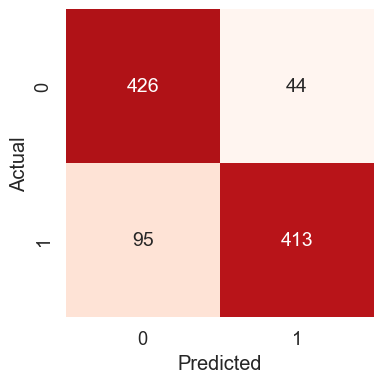

In [72]:
from sklearn.metrics import confusion_matrix
data = confusion_matrix(y_test, ypred)
df_cm = pd.DataFrame(data, columns=np.unique(y_test), index = np.unique(y_test))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (4,4))
sns.set(font_scale=1.2)
sns.heatmap(df_cm, annot=True,annot_kws={"size": 14}, cbar=False,
          vmax=500, square=True, fmt="d", cmap="Reds")# font size

### True Positives (TP) = there are 413 true positives (i.e., the model correctly identified 413 instances of class 1
### False Positives (FP) = there are 44 false positives (i.e., the model misclassified 44 instances of class 0 as class1 
### True Negative (TN) = In this case, there are 426 true negatives (i.e., the model correctly identified 426 instances of class 0
### False Negative (FN) = In this case, there are 95 false negatives (i.e., the model misclassified 95 instances of class 1 as class 0

In [73]:
df_cm

Predicted,0,1
Actual,,
0,426,44
1,95,413


### ROC Graph

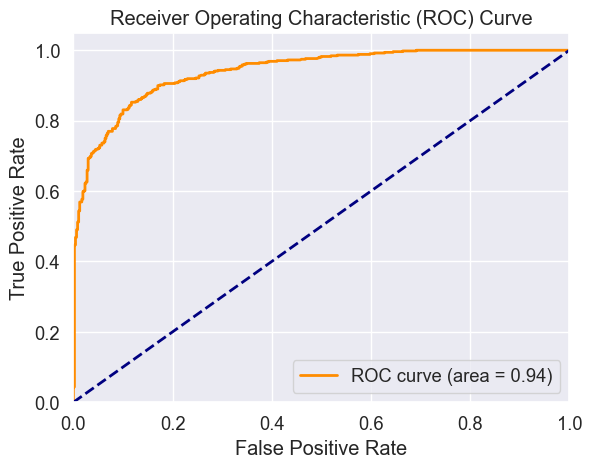

In [74]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


### A value of 0.94 is quite high and indicates that model has very good discriminatory power and can distinguish between two classes easily and efficiently

### Classification report

In [75]:
print(classification_report(y_test, ypred))

              precision    recall  f1-score   support

           0       0.82      0.91      0.86       470
           1       0.90      0.81      0.86       508

    accuracy                           0.86       978
   macro avg       0.86      0.86      0.86       978
weighted avg       0.86      0.86      0.86       978



### Using Sample Data to Classify for both Classes

In [76]:
sample_data0 = {
    'length': [441.301529],
    'weight': [9.439796e-01],
    'count': [612.683711],
    'looped': [107.881919],
    'neighbors': [2.238271],
    'income': [8.689590e+07] 
}

# Create the DataFrame
df_sample = pd.DataFrame(sample_data0)
df_sample

,length,weight,count,looped,neighbors,income
0,441.301529,0.94398,612.683711,107.881919,2.238271,86895900.0


In [77]:
predicted_outcome = pipe.predict(df_sample)
predic_Value = predicted_outcome[0]
sample(predic_Value)

This group belong to Class 0 which means they are fraud transactions and dangerous groups attack patterns are higher values for length, weight, count, looped, neighbors


In [78]:
sample_data = {
    'length': [20.271225],
    'weight': [4.738828e-01],
    'count': [2.488889],
    'looped': [0.243305],
    'neighbors': [1.839316],
    'income': [9.635576e+09]
}

# Create a DataFrame from the sample data
sample_df = pd.DataFrame(sample_data)
sample_df

,length,weight,count,looped,neighbors,income
0,20.271225,0.473883,2.488889,0.243305,1.839316,9.635576e+09


In [79]:
predicted_outcome = pipe.predict(sample_df)
predic_Value = predicted_outcome[0]


In [80]:
sample(predic_Value)

This group belong to class 1 white transactions probability is high no fraudulent transactions


### Now Trying Neural Network Classifer with multiple hidden layers but its not performing as good as XGBoost

In [81]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


num_features = X_train.shape[1]
num_classes = len(set(y_train))

# Create the Keras model
model = Sequential()


model.add(Dense(256, activation='relu', input_shape=(num_features,)))



model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))


model.add(Dense(num_classes, activation='softmax'))

# Compile the model
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Print the model summary
model.summary()

# Train the model
batch_size = 16
epochs = 10
model.fit(X_train_scaled, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.5)

# Evaluate the model on the test data
loss, accuracy = model.evaluate(X_test_scaled, y_test)
print(f'Test loss: {loss}, Test accuracy: {accuracy}')


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               1792      
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_3 (Dense)             (None, 2)                 130       
                                                                 
Total params: 43,074
Trainable params: 43,074
Non-traina